# First Assignment of Datascience
# Mohammad Hossein Basouli - 401222020

# Second Dataset - Customer Personality Analysis

Importing the required libraries

In [67]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
plt.style.use('ggplot')
import seaborn as sns
import math

# Exploratory Data Analysis(EDA)

## Data Understanding

### Loading the dataset:

In [68]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [70]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Missing value lookup:

In [71]:
df.isna().sum(axis=0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### Value count of categorical features:

In [72]:
df.value_counts(subset=['Education'], normalize=True)

Education 
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: proportion, dtype: float64

### Checking for duplicate **persons** in the dataset:

In [73]:
df.duplicated(subset=['ID']).sum()

np.int64(0)

### Initial Data Preprocessing:

#### Handling Missing Values:

Since it's possible for the **customers** with missing values in **Income** column to be a group of interest in our further analysis, we retain them by imputing their missing values with the column's mean. This would allow us to preseve the valuable information in their other columns.

In [74]:
df.fillna({'Income': df['Income'].mean()}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Feature Engineering:

#### Adding **TotalSpendings** as a new column:

In [75]:
df['TotalSpendings'] = df.apply(lambda x:x[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(), axis=1)

## Visualization

### Multivariate Analysis

#### **Acceptance of Campaigns** <--> **Spending Behavior**

Distributions of **Total Spendings** in below reveals several key points: First, the distribution of both of the groups seems not to be normal. Second, The group that has accepted to be in the campaigns looks to have a significantly higher avg **Total Spendings**. We also see that the data is moderately imbalance(20% vs. 80%) but it doesn't affect our interpretation because the distribution of these two groups is different.

shape of accept:(463, 30) shape of the reject group :(1777, 30)


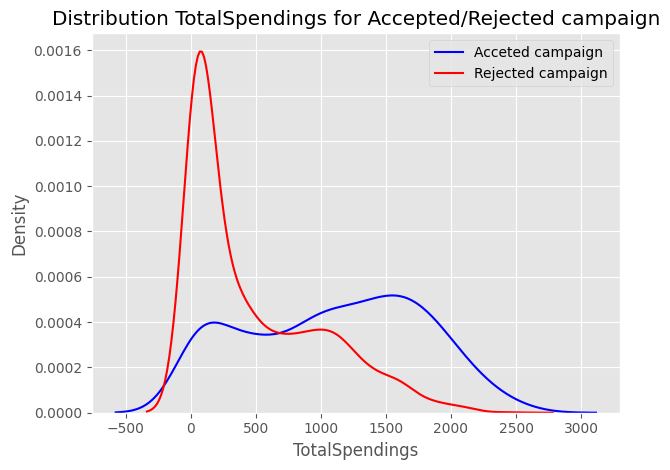

In [76]:
accept_group = df[df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)]
reject_group = df[~df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)]

print(f'shape of accept:{accept_group.shape} shape of the reject group :{reject_group.shape}')


ax = sns.kdeplot(data=accept_group, x='TotalSpendings', label='Acceted campaign', color='blue')
sns.kdeplot(data=reject_group, x='TotalSpendings', label='Rejected campaign', color='red', ax=ax)

ax.set_title('Distribution TotalSpendings for Accepted/Rejected campaign')
plt.legend()
plt.tight_layout()
output_path = 'distro_totalspending_for_accept_reject_campaign.png'
plt.savefig(output_path)
plt.show()

#### **Number of Deals Purchases** <--> **Campaign Acceptance**

The histograms below provide several insights: First, the distributions of **Number of Deals Purchases** for the two customer groups — those who **accepted campaigns** and those who did not — are both highly skewed to the right, indicating they are not normal. Second, there is no significant difference between these two groups in terms of **Number of Deals Purchases**, suggesting that the business has not been effective in motivating customers who accepted the campaigns to make **deals purchases**.

*Note: The data in this analysis is imbalance(20% **accepted group** vs. 80% **rejected group**); We have used under sampling on **reject group** in order to overcome data imbalance.*

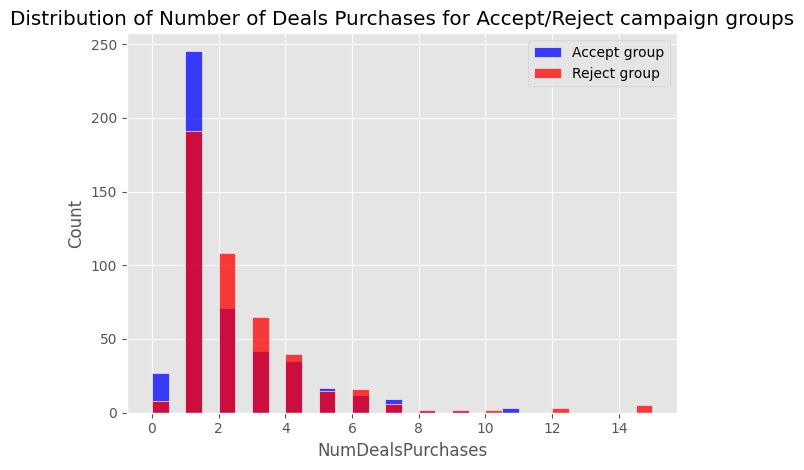

In [77]:
accept_group = df[df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)].copy()
reject_group = df[~df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)].copy()

reject_group = reject_group.sample(n=accept_group.shape[0], random_state=10, replace=True)

ax = sns.histplot(accept_group, x='NumDealsPurchases', label='Accept group', color='blue')
sns.histplot(reject_group, x='NumDealsPurchases', label='Reject group', color='red')
ax.set_title('Distribution of Number of Deals Purchases for Accept/Reject campaign groups')
plt.legend()
plt.tight_layout()
output_path = 'distro_num_of_deal_purchases_accept_reject_campaign.png'
plt.savefig(output_path)
plt.show()

#### **Education Level** <--> **Income**

Violin plot below shows a significant difference of **Income** between different **Education Levels**. More specifically, the **Income** in the group with Basic Level, seems very much less than the other groups(both in terms of all the statistics.). We also saw in earlier sections that the data is imbalanced(see the table below)
| Education  | Proportion |
|------------|------------|
| Graduation | 0.503125   |
| PhD        | 0.216964   |
| Master     | 0.165179   |
| 2n Cycle   | 0.090625   |
| Basic      | 0.024107   |

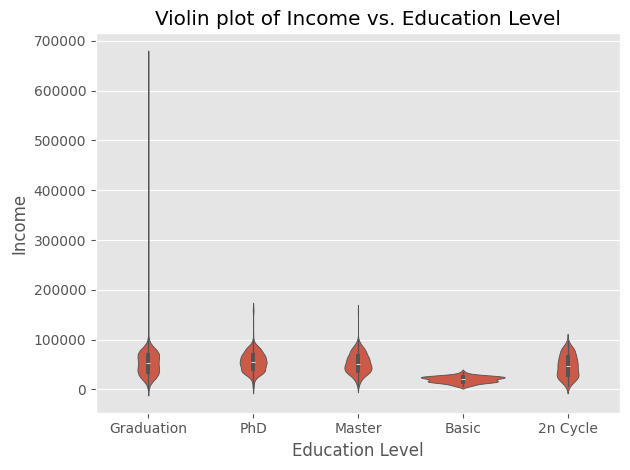

In [78]:
ax = sns.violinplot(data=df, x='Education', y='Income')
ax.set_title('Violin plot of Income vs. Education Level')
ax.set_xlabel('Education Level')
plt.tight_layout()
output_path = 'violin_income_vs_edu_level.png'
plt.savefig(output_path)

#### **Education Level** <--> **Acceptance of Campaigns**

The contingency table below shows that there is no significant difference in the proportion of people who accepted the campaigns versus those who did not, across different Education Levels. Also if we look at the expected frequence table of the contingency table, we see that the assumptions of chi-squared independence test holds.

| Education       | HasAcceptedCampaign (False) | HasAcceptedCampaign (True) 
|-----------------|-----------------------------|----------------------------|
| 2n Cycle        | 161.04                      | 41.96                      
| Basic           | 42.84                       | 11.16                      
| Graduation      | 894.05                      | 232.95                 
| Master          | 293.52                      | 76.48                     
| PHD             | 385.55                      | 100.45                     


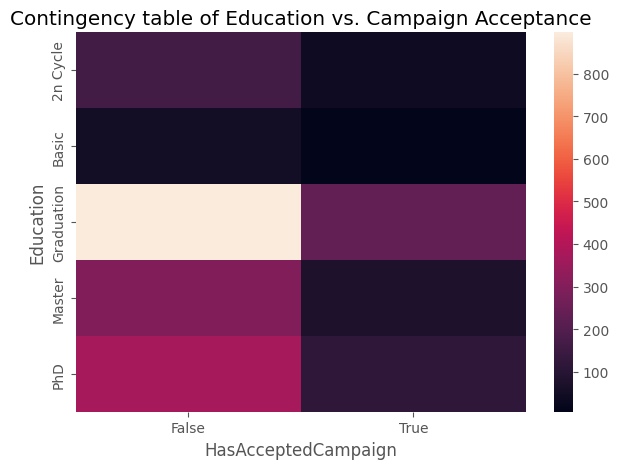

In [79]:
temp_df = df.copy()
temp_df['HasAcceptedCampaign'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)

contingency_table = pd.crosstab(temp_df['Education'], temp_df['HasAcceptedCampaign'])
sns.heatmap(contingency_table)
plt.title('Contingency table of Education vs. Campaign Acceptance')
plt.tight_layout()
output_path = 'contingency_edu_vs_campaign_acceptance.png'
plt.savefig(output_path)
plt.show()

#### **Having Children** <--> **Spending Behavior**

KDE plot from below tells us several things; First, that the distribution of these two group of customers is not normally distributed. And second, that the avg **Total Spendings** of the customers without any children is little bit higher.

shape of customers with children:(1602, 30) shape of the group without children:(1720, 30)


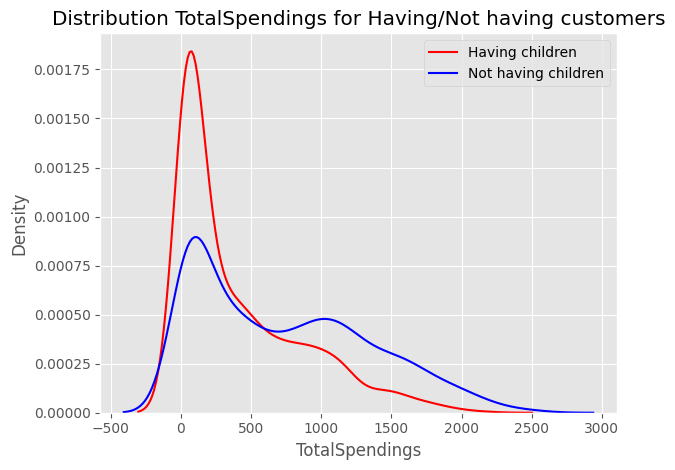

In [80]:
have_children = df[(df['Kidhome'] > 0) | (df['Teenhome'] > 0)]
dont_have_children = df[~(df['Kidhome'] > 0) | (df['Teenhome'] > 0)]

print(f'shape of customers with children:{have_children.shape} shape of the group without children:{dont_have_children.shape}')

ax = sns.kdeplot(data=have_children, x='TotalSpendings', label='Having children', color='red')
sns.kdeplot(data=dont_have_children, x='TotalSpendings', label='Not having children', color='blue')

ax.set_title('Distribution TotalSpendings for Having/Not having customers')
plt.legend()
plt.tight_layout()
output_path = 'distro_totalspending_for_having_not_having_customers.png'
plt.savefig(output_path)
plt.show()

#### **Product Category** <--> **Spendings of a customer**

By looking at the Parallel Coordiantes plot of **Spendings** for individual customers across different **categories**, we figure out that some of the categories differ in terms of **Spendings**

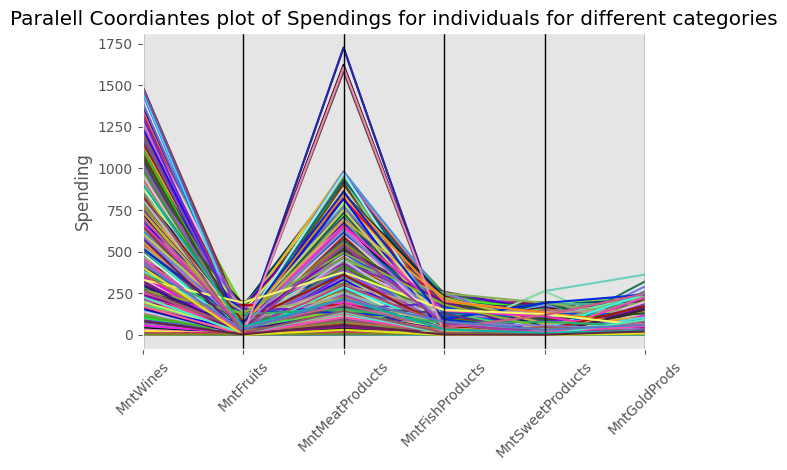

In [81]:
product_categories = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

from pandas.plotting import parallel_coordinates

df_subset = df[product_categories].copy()
df_subset['ID'] = df.index  # If an ID column exists, use that instead
ax = parallel_coordinates(df_subset, class_column='ID')
plt.xticks(rotation=45)
ax.set_title('Paralell Coordiantes plot of Spendings for individuals for different categories')
ax.set_ylabel('Spending')
plt.legend().remove()
plt.tight_layout()
output_path = 'parallel_coor_spending_indivi_category.png'
plt.savefig(output_path)
plt.show()

# Hypothesis Testing

1. Does the marketing campaign influence spending behavior across customer groups?

- Test used & Why: ***Mann-Whitney U test*** *(alternative=customers who have accepted campaigns > customers who have not accepted campaigns)*. From our prior analysis in EDA section, we figured out that the distribution of **TotalSpendings** within these two groups of **customers**(the ones who accepted campaigns and the ones who didn't.) is not normal. Thus the normality assumption of ***two sample t-test*** doesn't hold. Therefore we go for a non-parametric test.

- Result: Mann-Whitney U statistic: 628493.500, P-value: 0.000.

- Interpretation & Discussion: The p-value is very low. And this actually matches with our prior analysis in EDA section. Thus we conclude that customers who have accepted campaigns have a significantly **TotalSpendings** than those who haven't. 

In [82]:
accept_group = df[df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)]
reject_group = df[~df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)]

# Perform the Mann-Whitney U test
U_stat, p_value = stats.mannwhitneyu(accept_group['TotalSpendings'], reject_group['TotalSpendings'], alternative='greater')

# Display the result
print(f"Mann-Whitney U statistic: {U_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Mann-Whitney U statistic: 628493.500
P-value: 0.000


2. Have our buisness been effective in terms of motivating customers in the campaigns to go towards deals purchasing?

- Test used & Why: ***Mann-Whitney U test*** *(alternative=customers who have accepted campaigns < customers who haven't accepted campaigns)*. Based on our prior analysis in EDA, we know several key facts about our data which leads us to use a non-parametric test. First, the data in both of the groups seems not to be normally distributed. Second, that our data is moderately imbalance(20% accepted group vs. 80% rejected group), Since Mann-Whitney U test is robust to data imbalance we can use it, in order to examine our hypothesis.

- Result: Mann-Whitney U statistic: 340665.000, P-value: 0.000.

- Interpretation & Discussion: The extremely low p-value we obtained aligns with the insights from our EDA analysis. It indicates that the group who accepted the campaigns is significantly more reluctant to make deals purchases compared to those who did not accept the campaigns. This suggests that our business has struggled in effectively engaging and motivating customers who accepted the campaigns.


In [83]:
accept_group = df[df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)]
reject_group = df[~df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)]

# Perform the Mann-Whitney U test
U_stat, p_value = stats.mannwhitneyu(accept_group['NumDealsPurchases'], reject_group['NumDealsPurchases'], alternative='less')

# Display the result
print(f"Mann-Whitney U statistic: {U_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Mann-Whitney U statistic: 340665.000
P-value: 0.000


3. Do customers from different education levels have different income levels?

- Test used & Why: ***Kruskal-Wallis H test***. Based on what we saw earlier from the plot of the distributions of different groups of **Education**, we saw that the normality assumption of ANOVA one-way test doesn't hold within groups. Thus we go for a non-parametric test.

- Result: Kruskal-Wallis H statistic: 142.467, P-value: 0.000.

- Interpretation & Discussion: p-value is extremely low. This matches with our prior analysis in EDA as well. Thus we conclude that **Education Level** affects **Income Level**. 

In [84]:
# Group the data by 'group' column
grouped = df.groupby('Education')['Income'].apply(list)

# Extract the groups as a list of arrays
groups = [group for group in grouped]

# Perform the Kruskal-Wallis H test
H, p_value = stats.kruskal(*groups)

# Display the result
print(f"Kruskal-Wallis H statistic: {H:.3f}")
print(f"P-value: {p_value:.3f}")

Kruskal-Wallis H statistic: 142.467
P-value: 0.000


4. Is there a relationship between customer education level and acceptance of promotional campaigns?

- Test used & Why: Chi-Squared independence test. By having a look at the contingency table of exptected frequencies, we see that all of the expected frequencies are higher than 5. Thus we see that the assumptions of Chi-Squared independence test holds and we go for it.

- Result: Chi-Square Statistic: 5.865, P-value: 0.209.

- Interpretation & Discussion: Now we get a high p-value which means that there isn't a significant differece between different **Educational Levels** in terms of acceptance of **campaigns**. This actually matches with our prior analysis in EDA section as well.

In [85]:
temp_df = df.copy()
temp_df['HasAcceptedCampaign'] = df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].any(axis=1)

contingency_table = pd.crosstab(temp_df['Education'], temp_df['HasAcceptedCampaign'])
# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-Square Statistic: 5.865
P-value: 0.209


5. Do customers with children spend differently than those without children?

- Test used & Why: ***Mann-Whitney U test*** *(alternative=customers who have children < customers who don't have children)*. Just like the last test; From our prior analysis in EDA section, we figured out that the distribution of **TotalSpendings** within these two groups of **customers**(the ones who have children and the ones who have not.) is not normal. Thus the normality assumption of ***two sample t-test*** doesn't hold. Therefore we go for a non-parametric test.

- Result:Mann-Whitney U statistic: 937520.000, P-value: 0.000.

- Interpretation & Discussion: Again we get an extremely low p-value, which again matches with our prior analysis in EDA section. Thus we accept that the customers who don't have children have a significantly higher **TotalSpendings** than those who don't have children.

In [86]:
have_children = df[(df['Kidhome'] > 0) | (df['Teenhome'] > 0)]
dont_have_children = df[~(df['Kidhome'] > 0) | (df['Teenhome'] > 0)]

# Perform the Mann-Whitney U test
U_stat, p_value = stats.mannwhitneyu(have_children['TotalSpendings'], dont_have_children['TotalSpendings'], alternative='less')

# Display the result
print(f"Mann-Whitney U statistic: {U_stat:.3f}")
print(f"P-value: {p_value:.3f}")

Mann-Whitney U statistic: 937520.000
P-value: 0.000


6. Is there a significant difference in spending on different product categories?

- Test used: ***Friedman Test***. 

- Result: Friedman Test Statistic: 5967.749, P-value: 0.000.

- Interpretation & Discussion: Once again, we obtain an extremely low p-value which shows an significant difference between different product **categories** in terms of **Spendings** for them based on each individual **customer**.

In [87]:
product_categories = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

list_df_categories = [df[cat] for cat in product_categories]

# Perform the Friedman Test
stat, p_value = stats.friedmanchisquare(*list_df_categories)

# Display the results
print(f"Friedman Test Statistic: {stat:.3f}")
print(f"P-value: {p_value:.3f}")

Friedman Test Statistic: 5967.749
P-value: 0.000
